# Projet 2 – Analyse de données de systèmes éducatifs

Ce projet vise à explorer, nettoyer et analyser des données issues du système éducatif. Il met l’accent sur les fondamentaux : statistiques descriptives, gestion des valeurs manquantes, et visualisation des données.

🔧 Objectifs :
- Analyser statistiquement des données réelles
- Nettoyer les anomalies dans un dataset

Data : 
- Les données sont issues de [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE = "StudentsPerformance"
DATA = pd.read_csv(f"../data/{FILE}.csv")
print(DATA.columns)
print(DATA.shape)
DATA.head()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
MALE = DATA.groupby("gender").get_group("male")
print(MALE.shape)
MALE.head()

(482, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [56]:
preparation_female = MALE["test preparation course"].value_counts().to_dict()
preparation_female

{'none': 308, 'completed': 174}

In [57]:
FEMALE = DATA.groupby("gender").get_group("female")
print(FEMALE.shape)
FEMALE.head()

(518, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [58]:
preparation_female = FEMALE["test preparation course"].value_counts().to_dict()
preparation_female

{'none': 334, 'completed': 184}

Affichage 3D des résultats de math d'écriture et de lecture avec comme label `MALE` et `FEMALE`

Mean Male Scores:
math score       68.728216
reading score    65.473029
writing score    63.311203
dtype: float64

Mean Female Scores:
math score       63.633205
reading score    72.608108
writing score    72.467181
dtype: float64

Mean All Scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


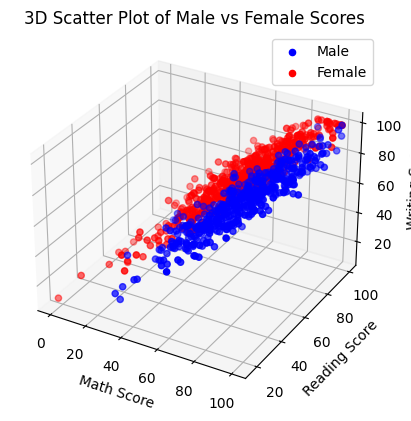

In [59]:
mean_male = MALE[["math score", "reading score", "writing score"]].mean()
mean_female = FEMALE[["math score", "reading score", "writing score"]].mean()
mean_all = DATA[["math score", "reading score", "writing score"]].mean()
print("Mean Male Scores:")
print(mean_male)
print("\nMean Female Scores:")
print(mean_female)
print("\nMean All Scores:")
print(mean_all)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MALE["math score"], MALE["reading score"], MALE["writing score"], color='b', label='Male')
ax.scatter(FEMALE["math score"], FEMALE["reading score"], FEMALE["writing score"], color='r', label='Female')
ax.set_xlabel("Math Score")
ax.set_ylabel("Reading Score")
ax.set_zlabel("Writing Score")
ax.set_title("3D Scatter Plot of Male vs Female Scores")
ax.legend()
plt.show()

Voir s'il y a une corrélation entre le fait de manger et avec des résultats plus faibles

Mean Free Scores:
math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

Mean Standard Scores:
math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64


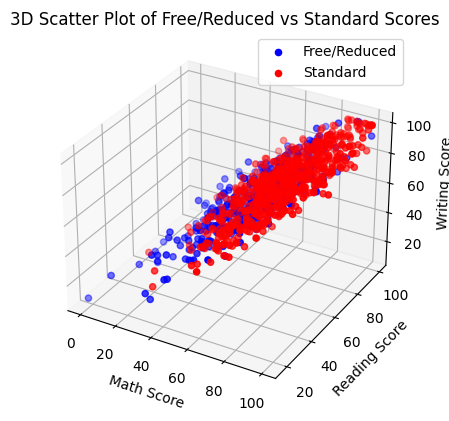

In [60]:
FREE = DATA.groupby("lunch").get_group("free/reduced")
STANDARD = DATA.groupby("lunch").get_group("standard")

mean_free = FREE[["math score", "reading score", "writing score"]].mean()
mean_standard = STANDARD[["math score", "reading score", "writing score"]].mean()
print("Mean Free Scores:")
print(mean_free)
print("\nMean Standard Scores:")
print(mean_standard)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(FREE["math score"], FREE["reading score"], FREE["writing score"], color='b', label='Free/Reduced')
ax.scatter(STANDARD["math score"], STANDARD["reading score"], STANDARD["writing score"], color='r', label='Standard')
ax.set_xlabel("Math Score")
ax.set_ylabel("Reading Score")
ax.set_zlabel("Writing Score")
ax.set_title("3D Scatter Plot of Free/Reduced vs Standard Scores")
ax.legend()
plt.show()

Visiblement il semble qu'une réduction de nourriture entraine une baisse de résultats

Est ce que les données sont significatifs ?

In [62]:
# Test si les données sont significatives
from scipy import stats

COLUMNS = ["math score", "reading score", "writing score"]

def cohen_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

for col in COLUMNS:
    x = FREE[col].dropna()
    y = STANDARD[col].dropna()
    
    t_stat, p_val = stats.ttest_ind(x, y, equal_var=False)
    d = cohen_d(x, y)

    # Intervalle de confiance 95 %
    mean_diff = x.mean() - y.mean()
    se_diff = np.sqrt(np.var(x, ddof=1)/len(x) + np.var(y, ddof=1)/len(y))
    df = len(x) + len(y) - 2
    ci_low, ci_high = stats.t.interval(0.95, df=df, loc=mean_diff, scale=se_diff)

    print(f"=== {col.upper()} ===")
    print(f"Différence moyenne \t\t: {mean_diff:.2f}")
    print(f"Intervalle de confiance \t: [{ci_low:.2f}, {ci_high:.2f}]")
    print(f"p-value \t\t\t: {p_val:.4f}")
    print(f"Cohen's d \t\t\t: {d:.2f}")
    
    if p_val < 0.05:
        print("Résultat significatif : rejet de l'hypothèse nulle (H0)")
    else:
        print("Non significatif : pas de rejet de l'hypothèse nulle (H0)")
    print()


=== MATH SCORE ===
Différence moyenne 		: -11.11
Intervalle de confiance 	: [-13.01, -9.21]
p-value 			: 0.0000
Cohen's d 			: -0.78
Résultat significatif : rejet de l'hypothèse nulle (H0)

=== READING SCORE ===
Différence moyenne 		: -7.00
Intervalle de confiance 	: [-8.88, -5.12]
p-value 			: 0.0000
Cohen's d 			: -0.49
Résultat significatif : rejet de l'hypothèse nulle (H0)

=== WRITING SCORE ===
Différence moyenne 		: -7.80
Intervalle de confiance 	: [-9.75, -5.85]
p-value 			: 0.0000
Cohen's d 			: -0.53
Résultat significatif : rejet de l'hypothèse nulle (H0)



Selon les résultats de mesure l'hypothèse que le manque de nourriture mène à une baisse des résultats